<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/KNN_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
winedf=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Wine_Quality.csv')

In [ ]:
winedf.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
winedf.isnull().sum().sort_values(ascending=False)

winedf['fixed acidity'].fillna(value=winedf['fixed acidity'].mean(),inplace=True)
winedf['pH'].fillna(value=winedf['pH'].mean(),inplace=True)
winedf['volatile acidity'].fillna(value=winedf['volatile acidity'].mean(),inplace=True)
winedf['sulphates'].fillna(value=winedf['sulphates'].mean(),inplace=True)
winedf['citric acid'].fillna(value=winedf['citric acid'].mean(),inplace=True)
winedf['chlorides'].fillna(value=winedf['chlorides'].mean(),inplace=True)
winedf['residual sugar'].fillna(value=winedf['residual sugar'].mean(),inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
winedf['type']=l.fit_transform(winedf['type'])

In [ ]:
winedf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
X=winedf.values[:,:12]
Y=winedf.values[:,-1]

In [ ]:
X

array([[ 1.   ,  7.   ,  0.27 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 1.   ,  6.3  ,  0.3  , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 1.   ,  8.1  ,  0.28 , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 0.   ,  6.3  ,  0.51 , ...,  3.42 ,  0.75 , 11.   ],
       [ 0.   ,  5.9  ,  0.645, ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.   ,  6.   ,  0.31 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
Y

array([6., 6., 6., ..., 6., 5., 6.])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
#Trainig the model for different values of k
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, Y_train) 
  
    training_score = clf.score(X_train, Y_train) 
    test_score = clf.score(X_test, Y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [ ]:
#Evaluating the model
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.7840334286342644, 0.48205128205128206]
3 : [0.7308115240818122, 0.46512820512820513]
4 : [0.6835276006157907, 0.47897435897435897]
5 : [0.6476797888717836, 0.45897435897435895]
6 : [0.6272267429074114, 0.4712820512820513]
7 : [0.6151308555091269, 0.46153846153846156]
8 : [0.5948977347701782, 0.46512820512820513]
9 : [0.5814822960193534, 0.4605128205128205]
10 : [0.5718055861007257, 0.4625641025641026]
11 : [0.5610292500549813, 0.4543589743589744]
12 : [0.5572905212227842, 0.4605128205128205]
13 : [0.5511326149109302, 0.4564102564102564]
14 : [0.5502529140092368, 0.4728205128205128]
15 : [0.5482735869804266, 0.4676923076923077]
16 : [0.5363976248075655, 0.4794871794871795]
17 : [0.5399164284143392, 0.46153846153846156]
18 : [0.5366175500329888, 0.46974358974358976]
19 : [0.5363976248075655, 0.4635897435897436]
20 : [0.5339784473279086, 0.46615384615384614]


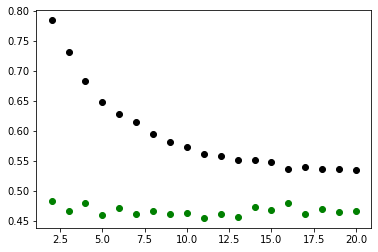

In [ ]:
#Plotting training and testing scores
plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.show() 